In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Image


## Instructions

By using Python and NetworkX, develop a graph which represents the public transport network of a city of your choice. If the city has an extensive and complex transport network, only represent a part of this network, for example, specific lines or areas of that city. Make sure your network has:
1. At least 15 nodes and 15 edges
2. At least four different lines coded with different colours
3. Added edge attributes for distance and time
4. Your program should be able to calculate the shortest path between two stations based on:
- number of intermediate stations
- distance of the journey
- time of the journey.

Once your public transport network map project is complete, share the image of your map on the Topic 8 Discussion forum.

Provide feedback to two transport maps developed by other students. Make sure the feedback is constructive and where possible positive.

In [2]:
%matplotlib inline

Map of Gotham found here: https://www.smithsonianmag.com/arts-culture/cartographer-gotham-city-180951594/

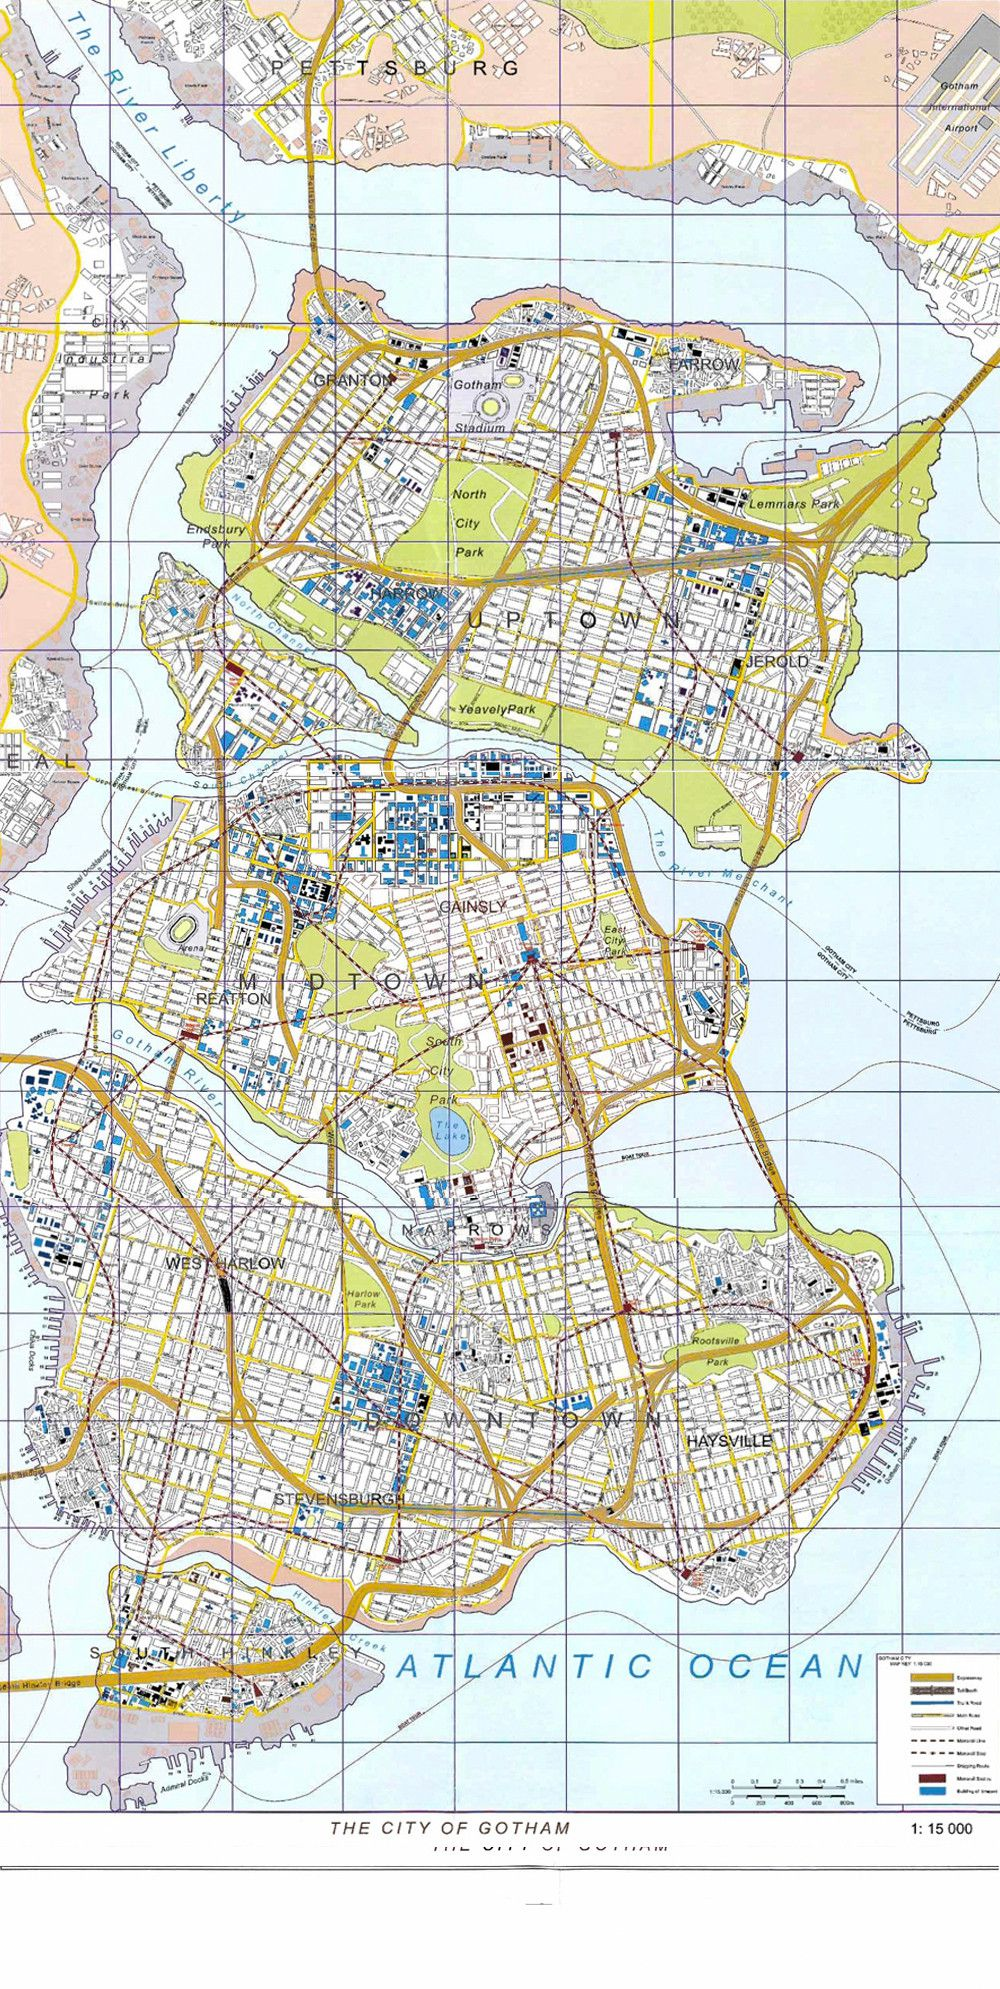

In [3]:
gotham_map = 'Data/gotham-map.jpg'

Image(filename=gotham_map, width = 1000) 

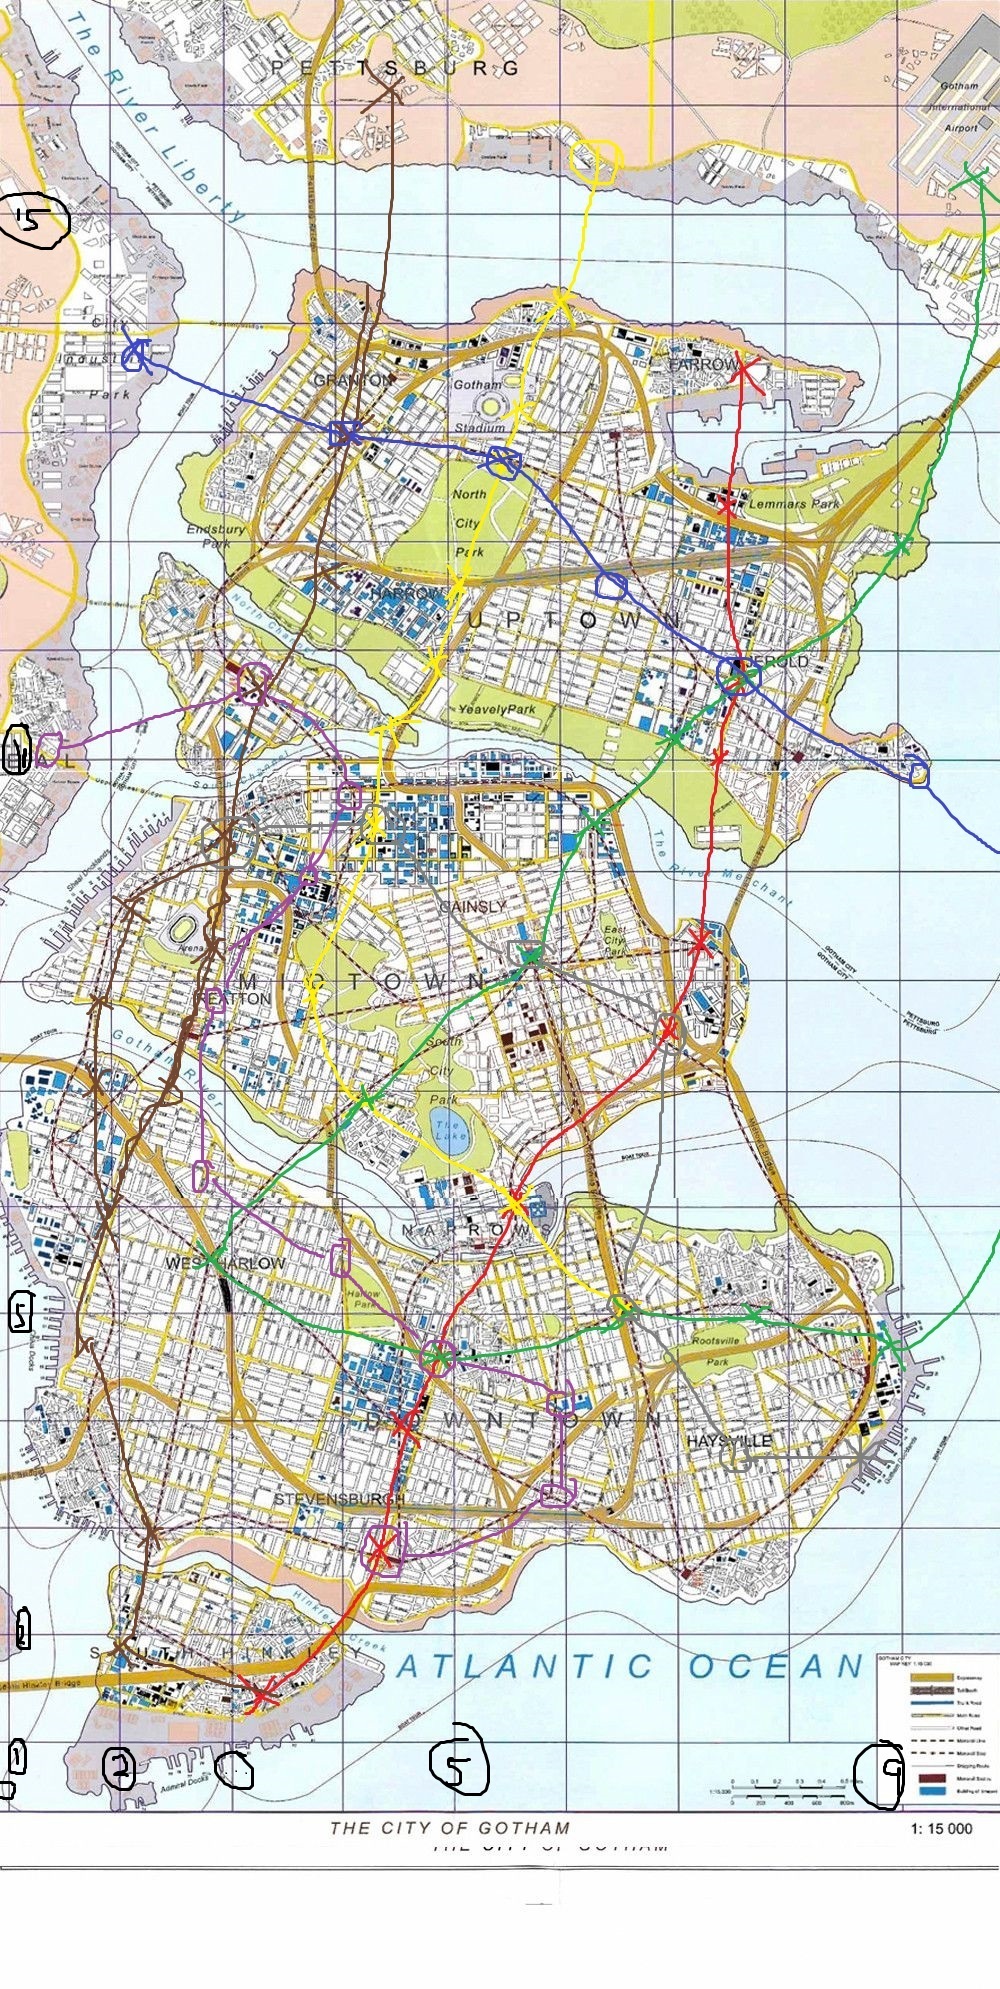

In [4]:
gotham_map = 'Data/gotham-map-subway-overlaid.jpg'

Image(filename=gotham_map, width = 1000) 

In [5]:
stations_df = pd.read_excel('Data/Gotham Subway Data.xlsx', sheet_name= 'Stations')
lines_df = pd.read_excel('Data/Gotham Subway Data.xlsx', sheet_name= 'Lines', usecols="A:G")

stations_df.head()

,Station Name,X Coords,Y Coords,Size
0,McMurdo,3.2,1.5,2
1,South Hinkley Bridge,2.0,1.9,1
2,Tricorner,2.2,3.0,1
3,Old Gotham,4.4,2.7,2
4,Canal Street,5.9,3.2,2


In [6]:
lines_df.head()

,Node Start,Node Stop,Distance (m),Time (minutes),Line,Colour,Width
0,Gotham Central,The Narrows,1076.289924,1.956891,Arkham Line,Cyan,3.0
1,The Narrows,South Robinson Park,1289.961240,2.345384,Arkham Line,Cyan,3.0
2,South Robinson Park,East Reatton,936.375993,1.702502,Arkham Line,Cyan,3.0
3,East Reatton,Upper Midtown,1341.044369,2.438262,Arkham Line,Cyan,3.0
4,Upper Midtown,East Trigate,582.408791,1.058925,Arkham Line,Cyan,3.0


In [7]:
#to plot the river later
river_nodes = pd.read_excel('Data/Gotham Subway Data.xlsx', sheet_name= 'River Nodes')
river_edges = pd.read_excel('Data/Gotham Subway Data.xlsx', sheet_name= 'River Edges')

In [8]:
Map = nx.MultiGraph()
for row, station in stations_df.iterrows():
    Map.add_node(station["Station Name"],
                 coords = (station["X Coords"], station["Y Coords"]),
                 size = station["Size"])
    #print ("Adding:",station["Station Name"])
    
for row, connection in lines_df.iterrows():
    Map.add_edge(connection["Node Start"],
                 connection["Node Stop"],
                 distance = connection["Distance (m)"],
                 time = connection["Time (minutes)"],
                 line = connection["Line"],
                 colour = connection["Colour"],
                 width = connection["Width"])

In [48]:
#Create our station sizes to let us plot separately
#We could plot these all at the same time but we want to give the cursors pretty different attrs and play around with them a bit
small_stations = list(stations_df[stations_df['Size'] == 1]['Station Name'])
medium_stations = list(stations_df[stations_df['Size'] == 2]['Station Name'])
large_stations = list(stations_df[stations_df['Size'] == 3]['Station Name'])
all_stations = list(stations_df["Station Name"])
 

In [49]:
list(large_stations)

['Gotham Central', 'Downtown', 'Upper Midtown', 'Uptown Central']

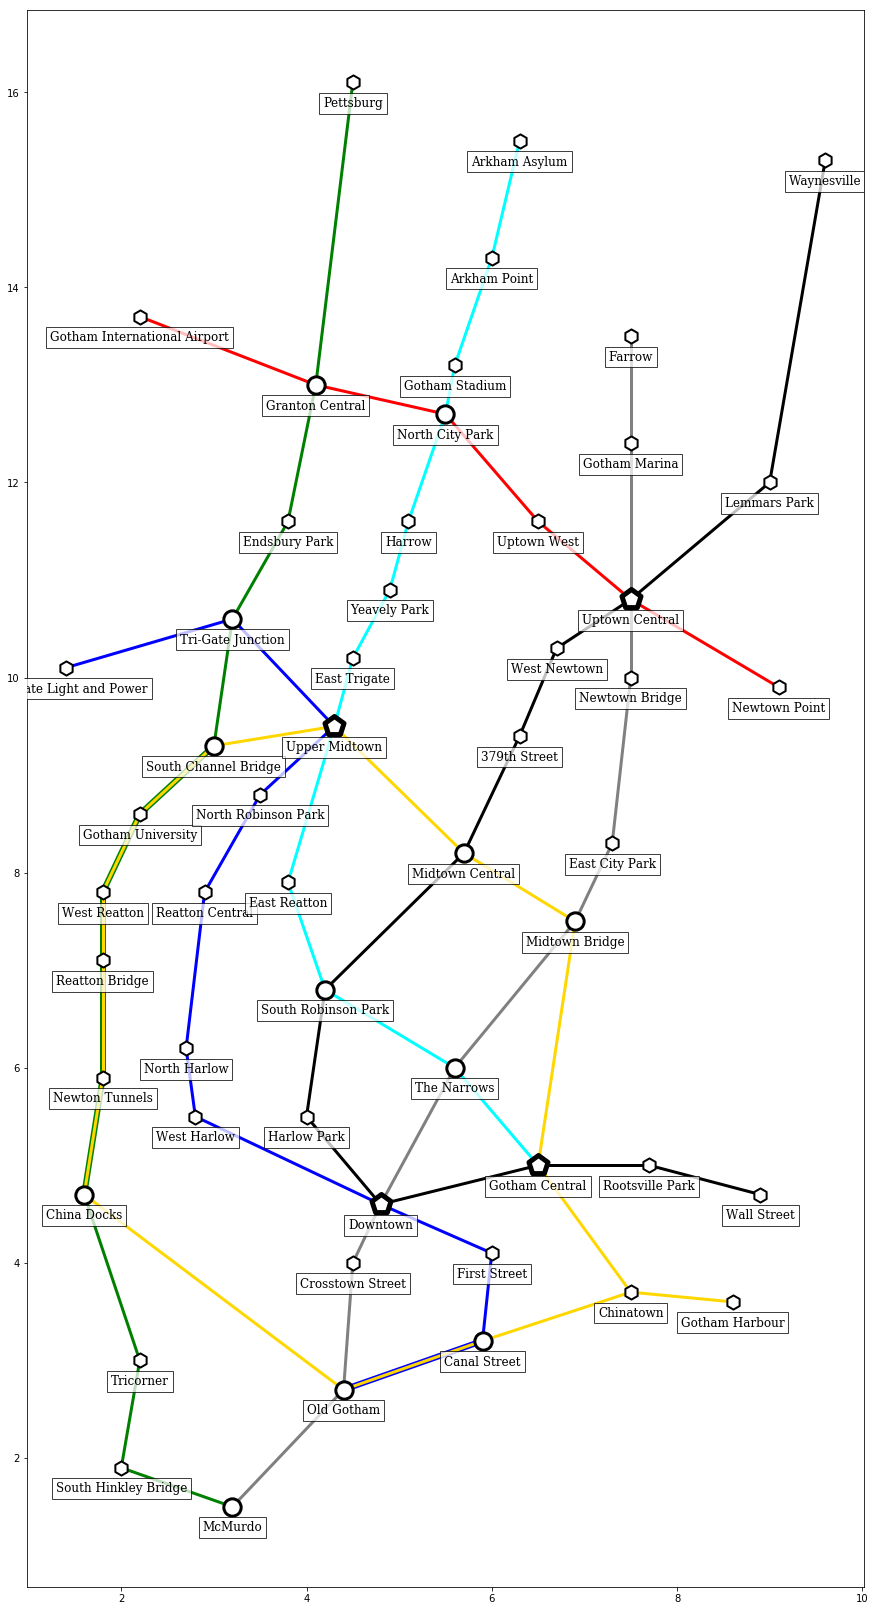

In [50]:
fig, ax = plt.subplots(1,1,figsize = (15,29))

#Get our node attributes
pos = nx.get_node_attributes(Map,'coords')
station_sizes = nx.get_node_attributes(Map, 'size')

#offset the labels
offset = -0.25
pos_labels = {}
keys = pos.keys()
for key in keys:
    x, y = pos[key]
    pos_labels[key] = (x, y+offset)


line_colours = nx.get_edge_attributes(Map, 'colour').values()
line_widths = list(nx.get_edge_attributes(Map, 'width').values())

label_options = {"ec": "k", "fc": "white", "alpha": 0.75}

#Draw our stations arranged by size
nx.draw_networkx_nodes(Map, pos, nodelist= small_stations, node_size = 200, node_shape= 'h', node_color = 'white', edgecolors='black', linewidths= 2)
nx.draw_networkx_nodes(Map, pos, nodelist= medium_stations, node_size = 300, node_shape= 'o', node_color = 'white', edgecolors='black', linewidths= 3)
nx.draw_networkx_nodes(Map, pos, nodelist= large_stations, node_size = 400, node_shape= 'p', node_color = 'white', edgecolors='black', linewidths= 5)




nx.draw_networkx_edges(Map, pos, ax = ax, edge_color= line_colours, width = line_widths)

nx.draw_networkx_labels(Map, pos_labels, horizontalalignment= 'center', verticalalignment= 'baseline',
                        font_family = 'serif', bbox= label_options)

plt.savefig('Outputs/Map-wo-rivers.jpeg')
plt.show()

In [51]:
#load all our river nodes and edges
Rivers = nx.Graph()


for row, point in river_nodes.iterrows():
    Rivers.add_node(point["Name"],
                 coords = (point["X Coords"], 
                           point["Y Coords"]))
    
for row, connection in river_edges.iterrows():
    Rivers.add_edge(connection["Start"],
                 connection["Stop"])

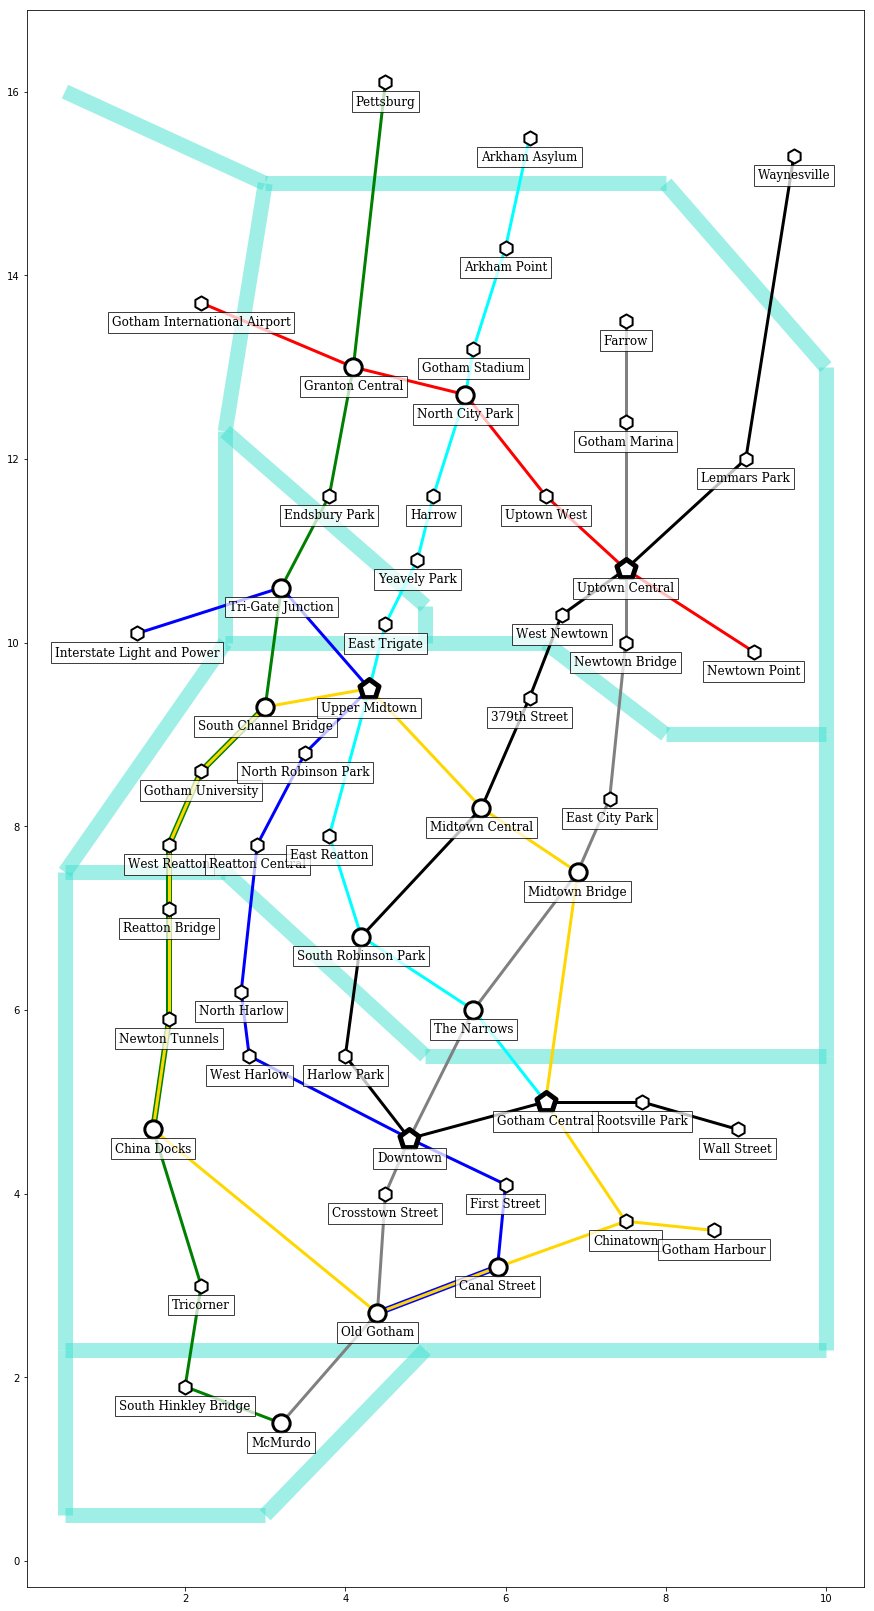

In [55]:
#And plot the map again

fig, ax = plt.subplots(1,1,figsize = (15,29))

#Get our node attributes
pos = nx.get_node_attributes(Map,'coords')
river_pos = nx.get_node_attributes(Rivers,'coords')
station_sizes = nx.get_node_attributes(Map, 'size')

#offset the labels
offset = -0.25
pos_labels = {}
keys = pos.keys()
for key in keys:
    x, y = pos[key]
    pos_labels[key] = (x, y+offset)


line_colours = nx.get_edge_attributes(Map, 'colour').values()
line_widths = list(nx.get_edge_attributes(Map, 'width').values())

label_options = {"ec": "k", "fc": "white", "alpha": 0.75}

def plot_map():
    #add our river underneath
    nx.draw_networkx_edges(Rivers, river_pos, ax = ax, edge_color = 'turquoise',
                           width = 15, alpha = 0.5, )


    #Draw our stations arranged by size
    nx.draw_networkx_nodes(Map, pos, nodelist= small_stations, node_size = 200, node_shape= 'h', node_color = 'white', edgecolors='black', linewidths= 2)
    nx.draw_networkx_nodes(Map, pos, nodelist= medium_stations, node_size = 300, node_shape= 'o', node_color = 'white', edgecolors='black', linewidths= 3)
    nx.draw_networkx_nodes(Map, pos, nodelist= large_stations, node_size = 400, node_shape= 'p', 
                           node_color = 'white', edgecolors='black', linewidths= 5)




    nx.draw_networkx_edges(Map, pos, ax = ax, edge_color= line_colours, node_size = station_sizes,
                          width = line_widths, nodelist= all_stations)




    nx.draw_networkx_labels(Map, pos_labels, horizontalalignment= 'center', verticalalignment= 'baseline',
                            font_family = 'serif', bbox= label_options)

plot_map()
plt.savefig('Outputs/Map-with-rivers.jpeg')

plt.show()
    


In [53]:
start, end = 'McMurdo', 'South Channel Bridge'
weight = 'time'

def calculate_shortest(start, end, weight):
    shortest_path_nodes = nx.shortest_path(Map, start, end, weight = weight)
    starts = []
    ends = []

    for i,node in enumerate(shortest_path_nodes[:-1]):
            starts.append(node)
            ends.append(shortest_path_nodes[i+1])
    shortest_path_route = list(zip(starts,ends))
    
    time_taken = nx.shortest_path_length(Map, start, end, weight= 'time')
    
    return shortest_path_nodes, shortest_path_route, time_taken

sp_nodes, sp_route, sp_time = calculate_shortest(start,end, weight)



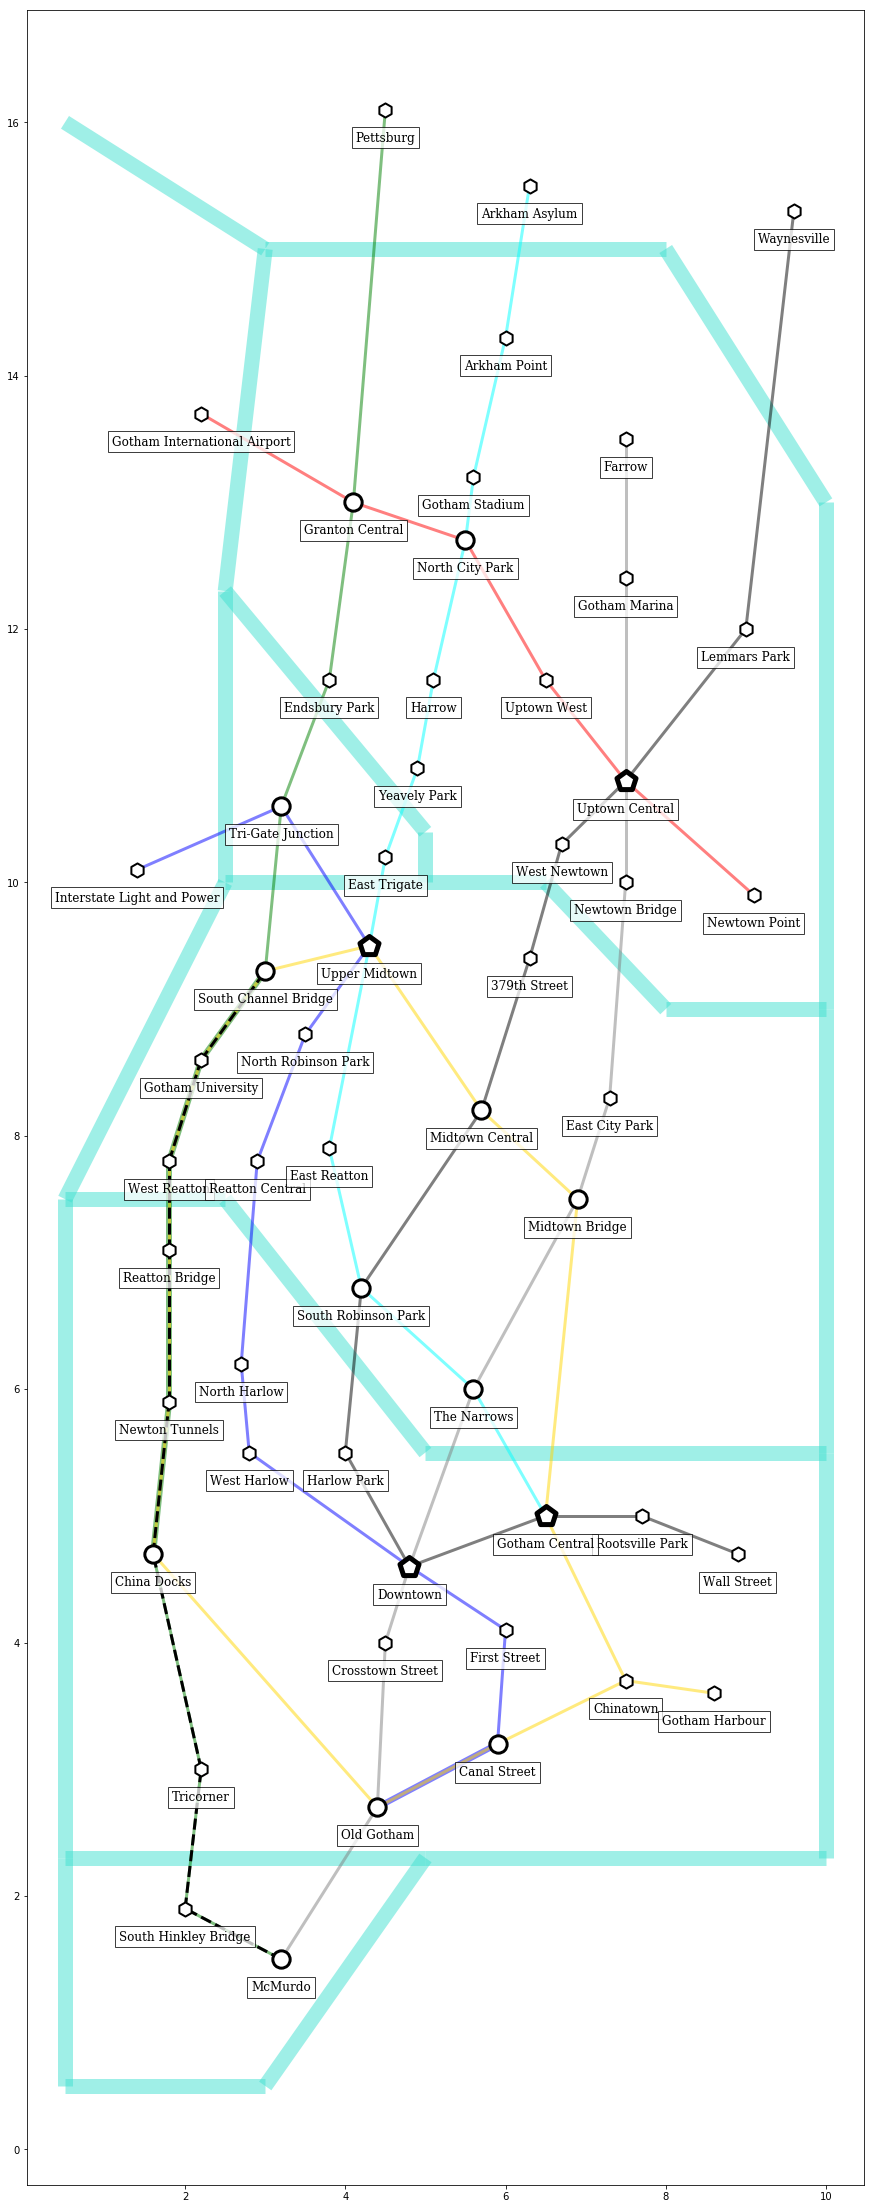

In [60]:
#DRAW IT AGAIN BUT LABEL THE ROUTE

def plot_route_map():
    fig, ax = plt.subplots(1,1,figsize = (15,40))

    #add our river first
    nx.draw_networkx_edges(Rivers, river_pos, ax = ax, edge_color = 'turquoise',
                           width = 15, alpha = 0.5)

    #Draw our stations arranged by size
    nx.draw_networkx_nodes(Map, pos, nodelist= small_stations, node_size = 200, node_shape= 'h', alpha = 1,
                          node_color = 'white', edgecolors='black', linewidths= 2)
    nx.draw_networkx_nodes(Map, pos, nodelist= medium_stations, node_size = 300, node_shape= 'o', alpha = 1,
                          node_color = 'white', edgecolors='black', linewidths= 3)
    nx.draw_networkx_nodes(Map, pos, nodelist= large_stations, node_size = 400, node_shape= 'p', alpha = 1, 
                           node_color = 'white', edgecolors='black', linewidths= 5)




    nx.draw_networkx_edges(Map, pos, ax = ax, edge_color= line_colours, node_size = station_sizes,
                          width = line_widths, alpha = 0.5)

    nx.draw_networkx_edges(Map, pos, edgelist=sp_route, ax = ax, edge_color= 'black', node_size = station_sizes,
                          width = 3, style = 'dashed')



    nx.draw_networkx_labels(Map, pos_labels, horizontalalignment= 'center', verticalalignment= 'baseline',
                            font_family = 'serif', bbox= label_options)

plot_route_map()
plt.savefig('Outputs/Map-with-rivers-and-route.jpeg')

plt.show()

Journey_time: 8.51 minutes


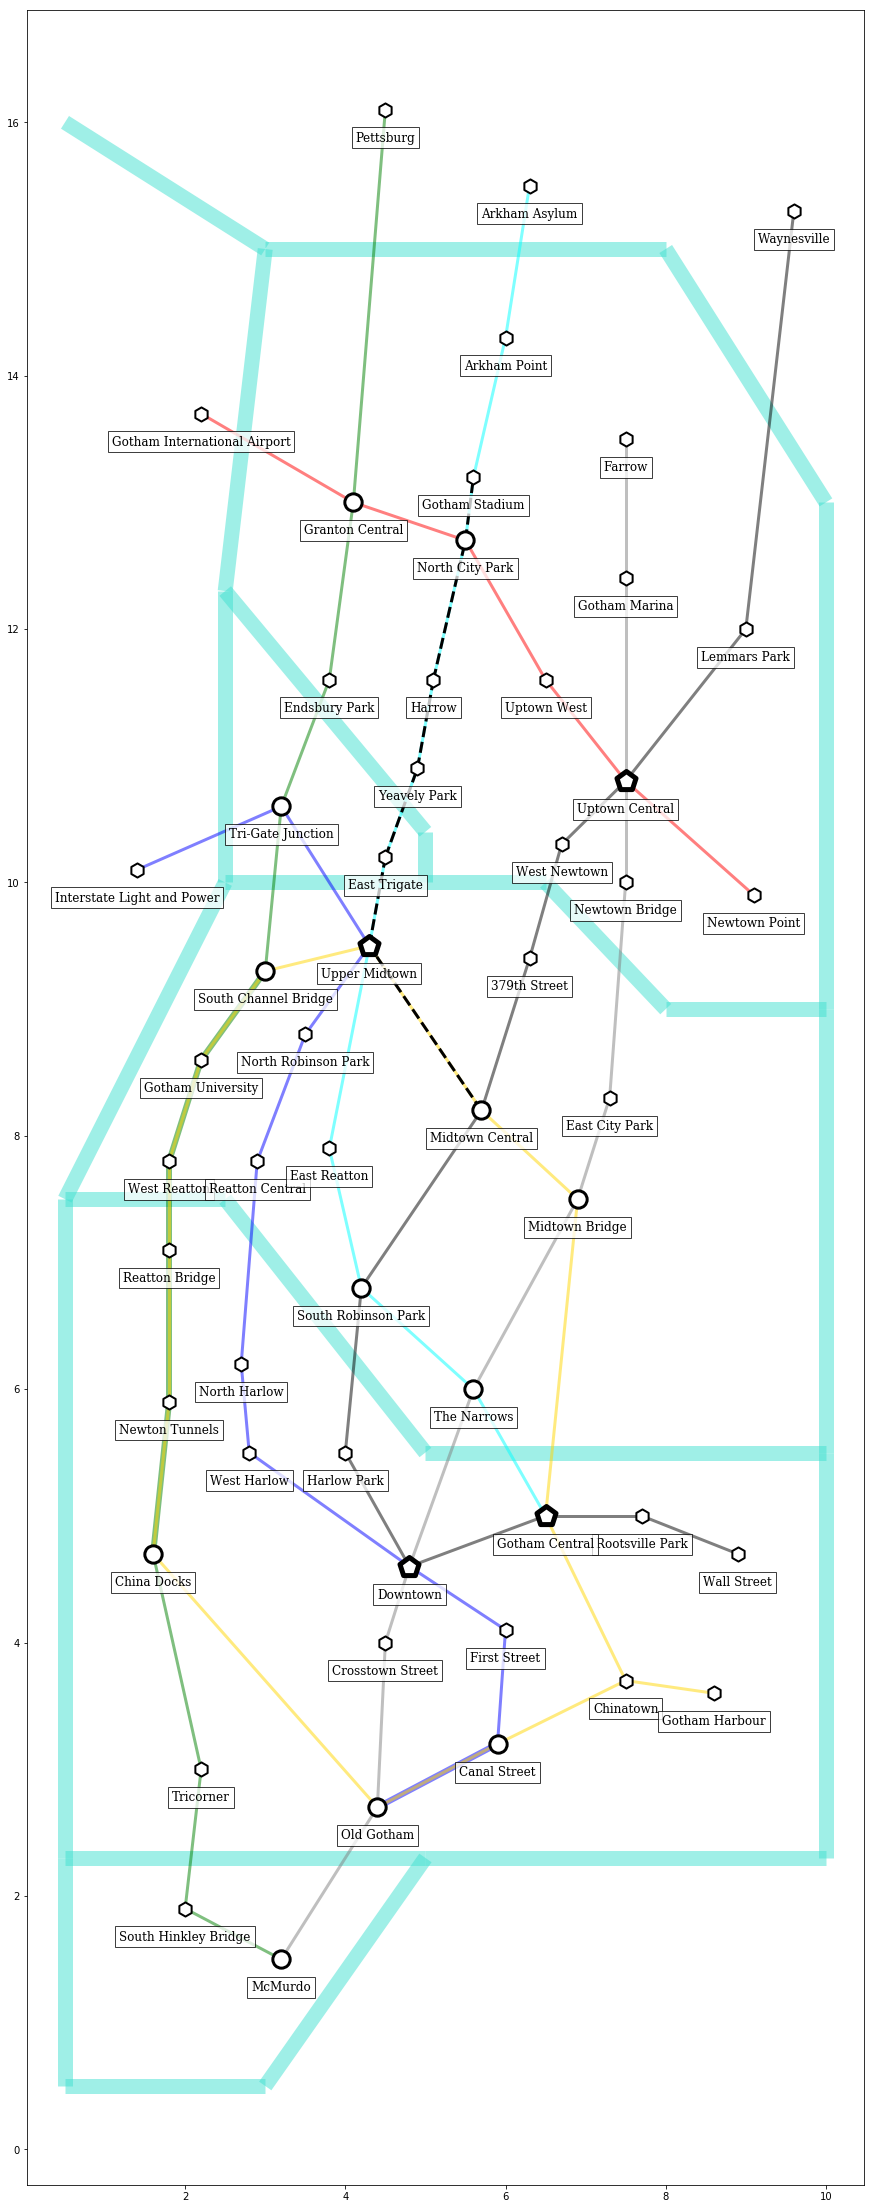

In [68]:
start, end = 'Midtown Central', 'Gotham Stadium'
weight = 'time'

sp_nodes, sp_route, sp_time = calculate_shortest(start,end, weight)

print("Journey_time:", round(sp_time,2), "minutes")
plot_route_map()
plt.savefig(f'Outputs/Map-route-{start}-{end}.jpeg')

plt.show()